In [66]:
import kagglehub
path = kagglehub.dataset_download("NUFORC/ufo-sightings")
print("Path to dataset files:", path)

Path to dataset files: /home/cameron/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2


In [67]:
import pandas as pd
import zipfile
import os

In [68]:
print(os.listdir(path))

['complete.csv', 'scrubbed.csv']


In [69]:
p1 = path + '/scrubbed.csv'
print(p1)

/home/cameron/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2/scrubbed.csv


In [70]:
scrubbed = pd.read_csv(p1)

/tmp/ipykernel_862126/2116430779.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  scrubbed = pd.read_csv(p1)


In [71]:
scrubbed.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [72]:
import matplotlib.pyplot as plt
import numpy as np


In [73]:
scrubbed.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [74]:
# Cleaning Data
# First we convert nuemerical data into numbers
scrubbed['latitude'] = pd.to_numeric(scrubbed['latitude'], errors='coerce')
scrubbed['duration (seconds)'] = pd.to_numeric(scrubbed['duration (seconds)'], errors='coerce')
scrubbed['duration (hours/min)'] = pd.to_numeric(scrubbed['duration (hours/min)'], errors='coerce')

In [ ]:
# I want to try and see if there is a relationship between the city and the number of ufo sightings.
# I decided that a boxplot would give me a good over view of the data

In [84]:
# First I see how many times a city appears in the dataset
# These numbers look promising
print(scrubbed['city'].value_counts())

city
seattle                                  525
phoenix                                  454
portland                                 374
las vegas                                368
los angeles                              353
                                        ... 
playa del cura (grand canaria island)      1
livermore/pleasonton (area)                1
hamburg (germany)                          1
cole camp                                  1
hamstead (hollyridge)                      1
Name: count, Length: 19900, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7b72241538c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b72239981a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b72241bf020>],
 'medians': [<matplotlib.lines.Line2D at 0x7b7223998710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b72239989b0>],
 'means': []}

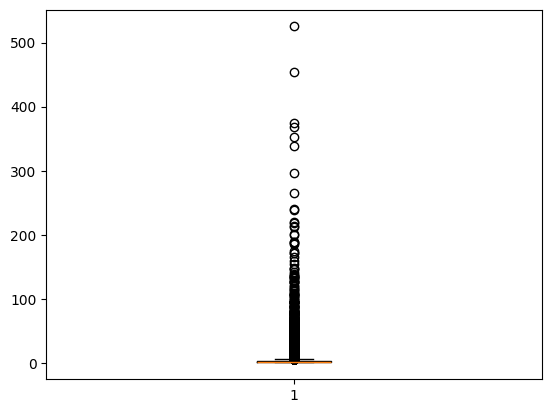

In [83]:
plt.boxplot(scrubbed['city'].value_counts())

In [85]:
# Well this doesn't look good.
# All the information is placed in the centre.
# Clearly there are two many countries to visualize in this way.


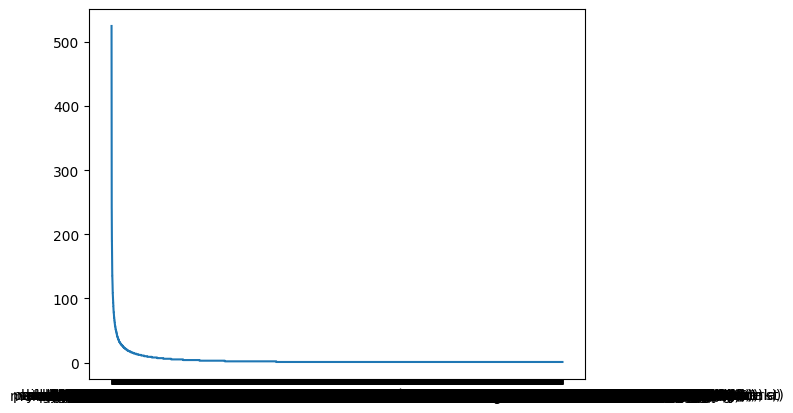

In [86]:
plt.plot(scrubbed['city'].value_counts())

In [91]:
# From this line plot I can see that fewer cities have most of the ufo sightings.
# So we will find the distribution a reasonable amount of cities to take
# Lets find out how many cities are in the top 10 percent.
# There should be a pandas function for this

In [92]:
city_counts = scrubbed['city'].value_counts()

# Get cumulative percentage
cumulative = city_counts.cumsum() / city_counts.sum()

# Get cities that cumulatively make up 90% of the data
top_cities = cumulative[cumulative <= 0.9].index

# Filter the original DataFrame to only those cities
scrubbed_with_90_percentile_cities = scrubbed[scrubbed['city'].isin(top_cities)]

In [93]:
scrubbed_with_90_percentile_cities

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,NaN,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,NaN,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,NaN,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,NaN,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,NaN,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,NaN,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,NaN,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,NaN,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,NaN,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


TypeError: Series.count() takes 1 positional argument but 2 were given